In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file_path = 'sms+spam+collection/SMSSpamCollection'

df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df.isna().sum()

label      0
message    0
dtype: int64

In [6]:
len(df)

5572

# Preprocessing

In [7]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
# Changing spam label('spam') to 1 and non-spam label('ham') to 0
df['label'] = df['label'].replace({'spam': 1, 'ham': 0})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
# converting messages to lowercases since for instance 'N' is computationally != 'n'
df['message'] = df['message'].apply(lambda a: a.lower())
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [11]:
# removing url's from messages
df['message'] = df['message'].str.replace(r'http\S+', '', regex=True)

df['message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

## NLP Processing

**Tokenization**
* splitting each message to individual words 

import nltk
from nltk.tokenize import word_tokenize

In [12]:
import nltk
from nltk.tokenize import word_tokenize

In [15]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\ATTAH KUMAH
[nltk_data]     MENSAH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\ATTAH KUMAH
[nltk_data]     MENSAH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def tokenize_message(messages):
    """
    tokenize each message to split words so they stand on their own
    """
    tokens = []

    tokenized_words = word_tokenize(messages)
    tokens.extend(tokenized_words)

    return tokens

df['tokenized'] = df['message'].apply(tokenize_message)


In [20]:
df.head(10)

,label,message,tokenized
0,0,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,0,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."
5,1,freemsg hey there darling it's been 3 week's n...,"[freemsg, hey, there, darling, it, 's, been, 3..."
6,0,even my brother is not like to speak with me. ...,"[even, my, brother, is, not, like, to, speak, ..."
7,0,as per your request 'melle melle (oru minnamin...,"[as, per, your, request, 'melle, melle, (, oru..."
8,1,winner!! as a valued network customer you have...,"[winner, !, !, as, a, valued, network, custome..."
9,1,had your mobile 11 months or more? u r entitle...,"[had, your, mobile, 11, months, or, more, ?, u..."


In [24]:
# Saving the tokenized dataframe

file_path = 'saved-data/tokenized_data.csv'

df.to_csv(file_path, index=False)
print(f'Saved tokenized data to {file_path}')

Saved tokenized data to saved-data/tokenized_data.csv


Removing common `stopwords` such as "the," "is," "and," etc., which do not carry significant meaning.

In [25]:
from nltk.corpus import stopwords

In [27]:
def remove_stopwords(tokenize_message):
    """
    removes words that do not have meanings from the tokenized messages
    """
    stop_word = set(stopwords.words('english'))
    filtered_words = [word for word in tokenize_message if word not in stop_word]

    return filtered_words

df["tokenized"] = df["tokenized"].apply(remove_stopwords)

In [28]:
df.head(10)

,label,message,tokenized
0,0,"go until jurong point, crazy.. available only ...","[go, jurong, point, ,, crazy, .., available, b..."
1,0,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,0,"nah i don't think he goes to usf, he lives aro...","[nah, n't, think, goes, usf, ,, lives, around,..."
5,1,freemsg hey there darling it's been 3 week's n...,"[freemsg, hey, darling, 's, 3, week, 's, word,..."
6,0,even my brother is not like to speak with me. ...,"[even, brother, like, speak, ., treat, like, a..."
7,0,as per your request 'melle melle (oru minnamin...,"[per, request, 'melle, melle, (, oru, minnamin..."
8,1,winner!! as a valued network customer you have...,"[winner, !, !, valued, network, customer, sele..."
9,1,had your mobile 11 months or more? u r entitle...,"[mobile, 11, months, ?, u, r, entitled, update..."


**Stemming or Lemmatization**
* Reduce words to their base or root form or to their dictionary form

In [29]:
from nltk.stem import PorterStemmer

In [33]:
stemmer = PorterStemmer()

def stemming_words(stopwords_tokenize_message):
    """
    breaking words to a base or it's dictionary form
    """
    stemmed_token = [stemmer.stem(word) for word in stopwords_tokenize_message]
    return stemmed_token


df['tokenized'] = df['tokenized'].apply(stemming_words)


In [32]:
df.head(20)

,label,message,tokenized
0,0,"go until jurong point, crazy.. available only ...","[go, jurong, point, ,, crazi, .., avail, bugi,..."
1,0,ok lar... joking wif u oni...,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,u dun say so early hor... u c already then say...,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"nah i don't think he goes to usf, he lives aro...","[nah, n't, think, goe, usf, ,, live, around, t..."
5,1,freemsg hey there darling it's been 3 week's n...,"[freemsg, hey, darl, 's, 3, week, 's, word, ba..."
6,0,even my brother is not like to speak with me. ...,"[even, brother, like, speak, ., treat, like, a..."
7,0,as per your request 'melle melle (oru minnamin...,"[per, request, 'mell, mell, (, oru, minnaminun..."
8,1,winner!! as a valued network customer you have...,"[winner, !, !, valu, network, custom, select, ..."
9,1,had your mobile 11 months or more? u r entitle...,"[mobil, 11, month, ?, u, r, entitl, updat, lat..."


In [37]:
%pip install pyspellchecker


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/6.8 MB 975.2 kB/s eta 0:00:07
   - -------------------------------------- 0.2/6.8 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.2/6.8 MB 1.3 MB/s eta 0:00:05
   - -------------------------------------- 0.3/6.8 MB 1.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/6.8 MB 1.5 MB/s eta 0:00:05
   --- ------------------------------------ 0.5/6.8 MB 1.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/6.8 MB 1.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/6.8 MB 1.7 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/6.8 MB 1.7 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/6.8 MB 1.6 MB/s eta 0:00:04
   ----- -------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
# spell checking and correction
from spellchecker import SpellChecker


# Initialize spell checker
spell = SpellChecker()

# Function to correct spelling of a single message
def correct_spelling(message):
    return [spell.correction(word) if word in spell else word for word in message]

# Apply the correction function to all messages in the DataFrame in batches
batch_size = 1000
num_batches = (len(df) + batch_size - 1) // batch_size

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df))
    df.loc[start_idx:end_idx, "tokenized"] = df.loc[start_idx:end_idx, "tokenized"].apply(correct_spelling)

# Join the corrected tokens back into a single string
df["tokenized"] = df["tokenized"].apply(' '.join)

In [51]:
df.head(10)

,label,message,tokenized
0,0,"go until jurong point, crazy.. available only ...","go jurong point , crazi .. avail bugi n great ..."
1,0,ok lar... joking wif u oni...,ok lar ... joke wif u oni ...
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"nah i don't think he goes to usf, he lives aro...","nah n't think goe usf , live around though"
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey darl 's 3 week 's word back ! 'd l...
6,0,even my brother is not like to speak with me. ...,even brother like speak . treat like aid patent .
7,0,as per your request 'melle melle (oru minnamin...,per request 'mell mell ( oru minnaminungint nu...
8,1,winner!! as a valued network customer you have...,winner ! ! valu network custom select receivea...
9,1,had your mobile 11 months or more? u r entitle...,mobil 11 month ? u r entitl updat latest colou...


In [54]:
# Remove whitespaces
df['tokenized'] = df['tokenized'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

 # Remove non-standard characters (e.g., special symbols, non-printable characters)
df['tokenized'] = df['tokenized'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

df.head(8)

,label,message,tokenized
0,0,"go until jurong point, crazy.. available only ...","go jurong point , crazi .. avail bugi n great ..."
1,0,ok lar... joking wif u oni...,ok lar ... joke wif u oni ...
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"nah i don't think he goes to usf, he lives aro...","nah n't think goe usf , live around though"
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey darl 's 3 week 's word back ! 'd l...
6,0,even my brother is not like to speak with me. ...,even brother like speak . treat like aid patent .
7,0,as per your request 'melle melle (oru minnamin...,per request 'mell mell ( oru minnaminungint nu...


In [92]:
# Getting our X & y
X = df.drop(['label', 'message'], axis=1)
y = df['label']

In [93]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [94]:
# create a CountVectorizer with max_features
cv = CountVectorizer(max_features=3000)

# fit and transform the corpus using CountVectorizer
X_cv = cv.fit_transform(df['tokenized'])

# create a tfidfTransformer()
tfidf = TfidfTransformer()

In [100]:
X = tfidf.fit_transform(X_cv).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

# Model Selection & Evaluation

In [101]:
from sklearn.model_selection import train_test_split

In [104]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [111]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import seaborn as sns

gnb = GaussianNB()
mnb = MultinomialNB()
cmb = ComplementNB()
bnb = BernoulliNB()
cnb = CategoricalNB()

In [126]:
# function to plot confusion matrix
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborns heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     center=True,
                     annot=True,
                     cbar=False,
                     fmt='.0f')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

GaussianNB model provided an accuracy score of 86.46%
GaussianNB model provided an precision score of 49.62%


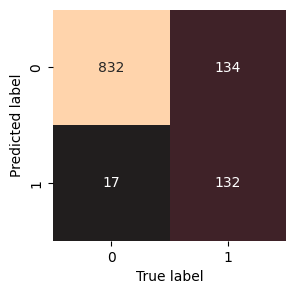

In [127]:
np.random.seed(42)
# Using the GaussianNB
gnb.fit(X_train, y_train)
y_pred_1 = gnb.predict(X_test)

# Accuracy Score
print(f'GaussianNB model provided an accuracy score of {accuracy_score(y_test, y_pred_1) * 100:.2f}%')
# Precision Score
print(f'GaussianNB model provided an precision score of {precision_score(y_test, y_pred_1) * 100:.2f}%')

# Plot Confusion matrix using seaborn, heatmap
conf_mat = confusion_matrix(y_test, y_pred_1)
plot_conf_mat(conf_mat);

In [119]:
confusion_matrix(y_test, y_pred_1)

array([[832, 134],
       [ 17, 132]], dtype=int64)